<a href="https://colab.research.google.com/github/Yasir323/TimeSeries-Course/blob/main/1_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O dataset.csv https://raw.githubusercontent.com/Yasir323/TimeSeries-Course/main/013%20IndexE8.csv

--2021-09-12 13:10:55--  https://raw.githubusercontent.com/Yasir323/TimeSeries-Course/main/013%20IndexE8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297722 (291K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>] 290.74K  --.-KB/s    in 0.02s   

2021-09-12 13:10:56 (12.2 MB/s) - ‘dataset.csv’ saved [297722/297722]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
original_raw_data = pd.read_csv('dataset.csv')
raw_data = original_raw_data.copy()
raw_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
raw_data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [5]:
raw_data.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

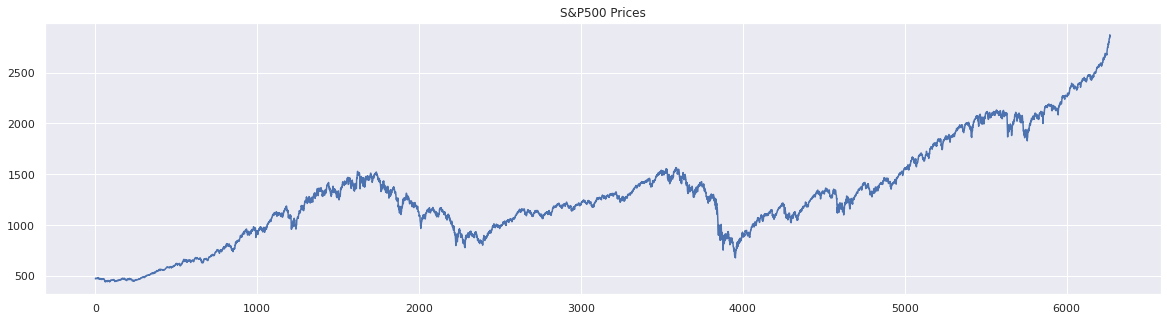

In [6]:
raw_data.spx.plot(figsize=(20, 5), title='S&P500 Prices')
plt.show()

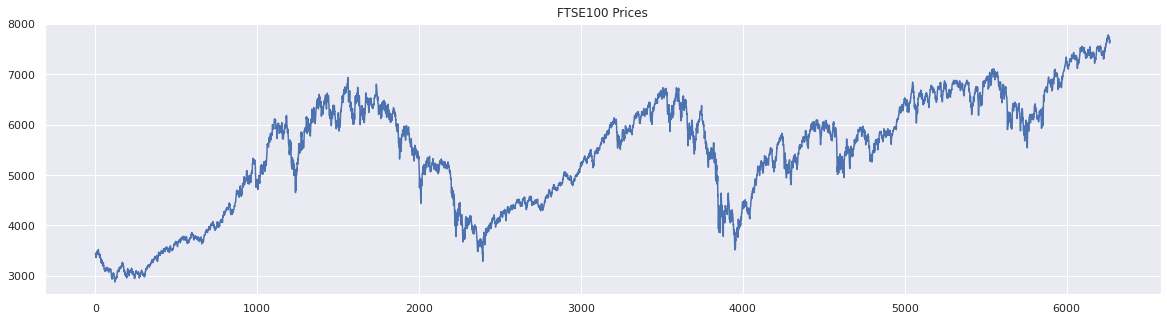

In [7]:
raw_data.ftse.plot(figsize=(20, 5), title='FTSE100 Prices')
plt.show()

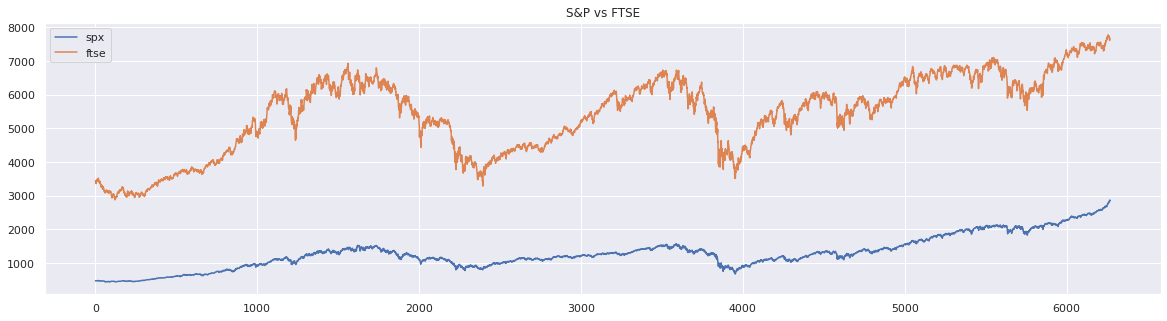

In [8]:
raw_data.spx.plot(figsize=(20, 5))
raw_data.ftse.plot(figsize=(20, 5))
plt.title('S&P vs FTSE')
plt.legend()
plt.show()

### QQ Plot

In [9]:
import scipy.stats
import pylab

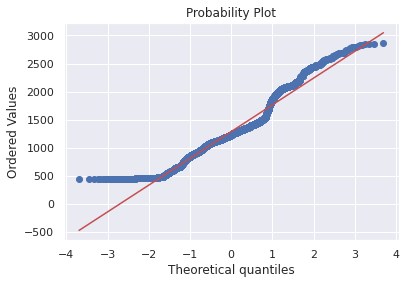

In [10]:
scipy.stats.probplot(raw_data.spx, plot=pylab)
pylab.show()

Let's examine the QQ Plot:
* The y-axis represents the price.
* The x-axis represents how many standard devations from the mean, the values are spreaded.
* The red line represents what the dataset should follow if the data were to be normally distributed. We can see that it is not noramlly distributed. But it is expected as this is a time series data.

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


#### Let's convert date to datetime object

In [12]:
df = raw_data.copy()

In [13]:
df.date = pd.to_datetime(df.date, dayfirst=True)

In [14]:
df.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

#### Let's make date our index

In [16]:
df.set_index('date', inplace=True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Let's set the frequency

In [18]:
df = df.asfreq('b')  # Business days
df.head(10)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26
1994-01-14,474.91,2151.05,3400.56,18973.70
1994-01-17,473.30,2115.56,3407.83,18725.37
1994-01-18,474.25,2130.35,3437.01,18514.55
1994-01-19,474.30,2132.52,3475.15,19039.40


#### Missing Values

In [19]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [20]:
df.interpolate(inplace=True)
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

#### Simplify the dataset
We'll analyze s&p data only.

In [24]:
df_sp = df.spx.to_frame()
df_sp.columns = ['Market Value']
df_sp.head()

,Market Value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [25]:
train_size = int(len(df_sp) * 0.8)

In [27]:
X_train = df_sp.iloc[:train_size]
X_test = df_sp.iloc[train_size:]
X_train.tail(), X_test.tail()

(            Market Value
 date                    
 2013-04-01   1562.173837
 2013-04-02   1570.252238
 2013-04-03   1553.686978
 2013-04-04   1559.979316
 2013-04-05   1553.278930,             Market Value
 date                    
 2018-01-23   2839.130362
 2018-01-24   2837.544008
 2018-01-25   2839.253031
 2018-01-26   2872.867839
 2018-01-29   2853.528411)

## White Noise
A special type of time series where the data doesn't follow a pattern.

**Conditions for white noise:**
* Constant (Zero) mean
* Constant variance
* No autocorrelation

Lets generate a white noise

In [28]:
white_noise = np.random.normal(
    loc=X_train['Market Value'].mean(),
    scale=X_train['Market Value'].std(),
    size=len(X_train)
)

In [29]:
X_train['White Noise'] = white_noise
X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Market Value,White Noise
date,,
1994-01-07,469.90,789.119190
1994-01-10,475.27,1379.237618
1994-01-11,474.13,1246.122167
1994-01-12,474.17,982.064033
1994-01-13,472.47,1144.756127


In [30]:
X_train.describe()

,Market Value,White Noise
count,5021.000000,5021.000000
mean,1091.658046,1094.847252
std,292.559254,300.955839
min,438.920000,-78.741684
25%,914.835752,890.815180
50%,1144.650000,1097.076811
75%,1316.280729,1297.199226
max,1570.252238,2109.711051


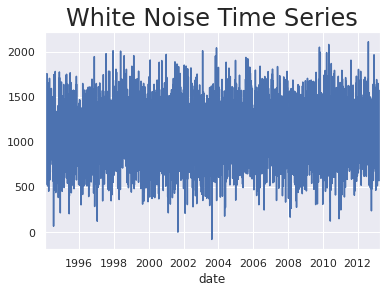

In [31]:
X_train['White Noise'].plot()
plt.title('White Noise Time Series', size=24)
plt.show()

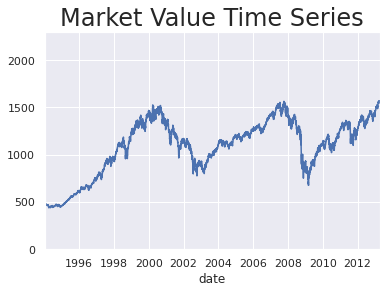

In [33]:
X_train['Market Value'].plot()
plt.title('Market Value Time Series', size=24)
plt.ylim(0, 2300)
plt.show()

## Random Walk
A Special type of time-series, where values tend to persist over time and the differences between periods are simply white noise. 

The best estimator for today's value is yesterday's value.

In [34]:
!wget -O random_walk.csv https://raw.githubusercontent.com/Yasir323/TimeSeries-Course/main/025%20RandWalk.csv

--2021-09-12 15:07:22--  https://raw.githubusercontent.com/Yasir323/TimeSeries-Course/main/025%20RandWalk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167878 (164K) [text/plain]
Saving to: ‘random_walk.csv’

random_walk.csv     100%[===================>] 163.94K  --.-KB/s    in 0.01s   

2021-09-12 15:07:22 (11.7 MB/s) - ‘random_walk.csv’ saved [167878/167878]



In [35]:
random_walk = pd.read_csv('random_walk.csv')
random_walk.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [36]:
random_walk.date = pd.to_datetime(random_walk.date, dayfirst=True)
random_walk.set_index('date', inplace=True)
random_walk = random_walk.asfreq('b')

In [37]:
random_walk.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [38]:
X_train['Random Walk'] = random_walk.price
X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Market Value,White Noise,Random Walk
date,,,
1994-01-07,469.90,789.119190,1122.139662
1994-01-10,475.27,1379.237618,1080.347860
1994-01-11,474.13,1246.122167,1082.095245
1994-01-12,474.17,982.064033,1083.639265
1994-01-13,472.47,1144.756127,1067.146255


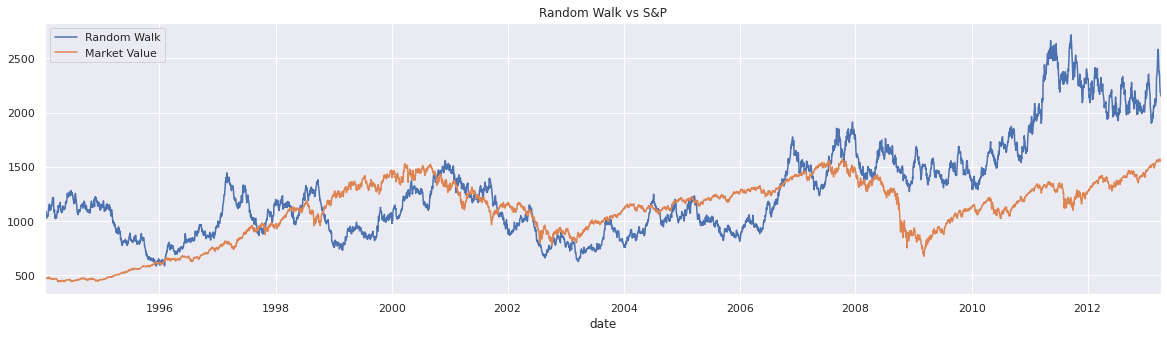

In [41]:
X_train['Random Walk'].plot(figsize=(20, 5))
X_train['Market Value'].plot()
plt.title('Random Walk vs S&P')
plt.legend()
plt.show()

## Market Efficiency
Measures the level of difficulty in forecasting correct future values.

## Stationarity
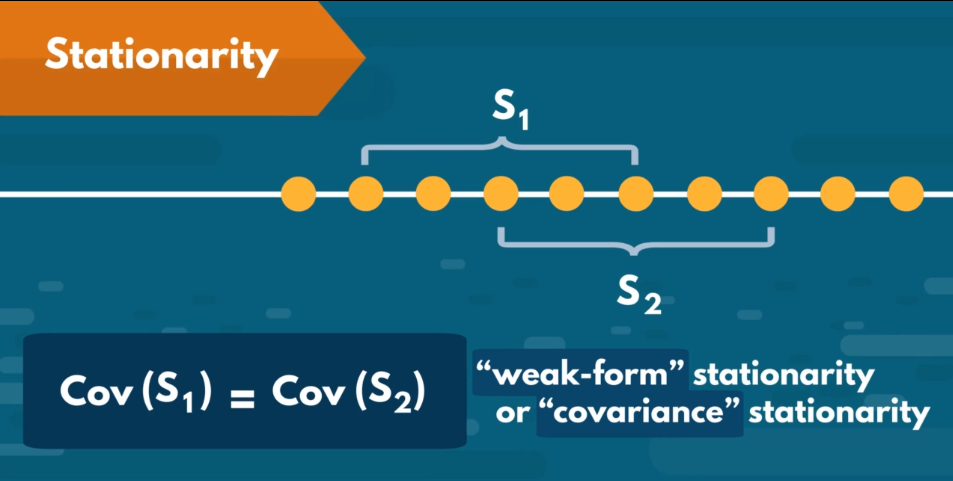

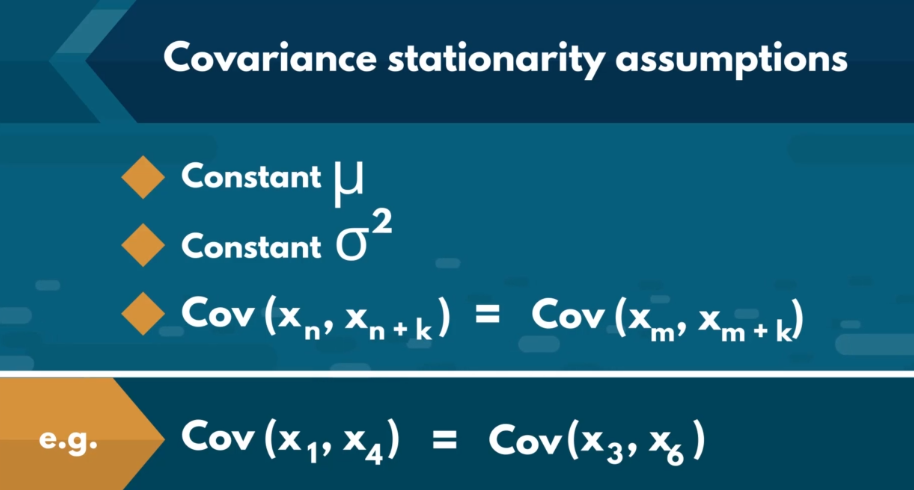

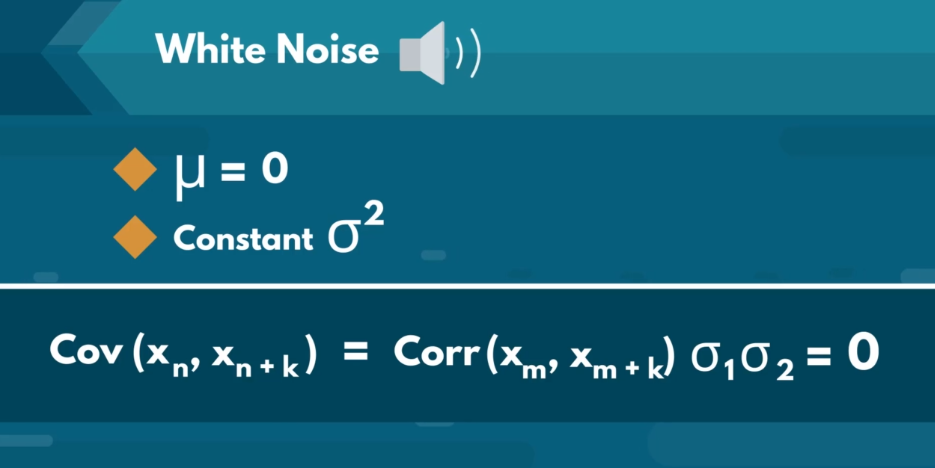

## Strict Stationarity
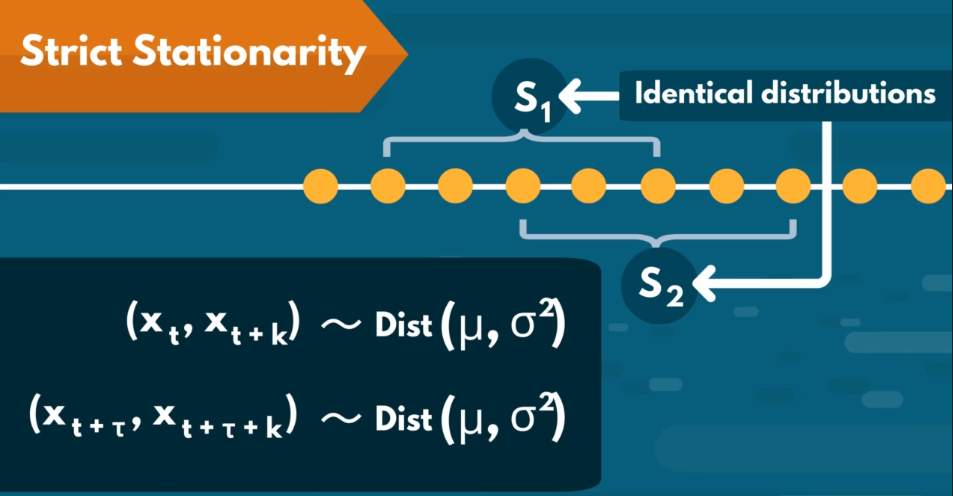

## Dickey-Fuller Test
To conduct time-series analysis, it is vital to check whether data comes from stationary or non-stationary process. Test to check if a dataset comes from a stationary process.

**Null Hypothesis:** Dataset comes from a non-stationary process.

In [47]:
import statsmodels.tsa.stattools as sts

In [48]:
sts.adfuller(X_train['Market Value'])

(-1.7371432251219479,
 0.4120838713552569,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39897.92531326632)

p value is 0.41 so there's is only a 59% chance of rejecting the null.

In [49]:
sts.adfuller(X_train['White Noise'])

(-69.69709288080311,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 71095.35507785536)

We can say with 100% confidence that White Noise is from a stationary process.

In [50]:
sts.adfuller(X_train['Random Walk'])

(-1.328607392768973,
 0.6159849181617378,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)

Again we can't say with certainity that this data comes from a stationary process since p value is only 0.61. Based on the p value there's a 61% chance that the data comes from a non-stationary process.

## Seasonality
* Trend - Pattern
* Seasonal - Cyclical effects
* Residual - Error of prediction

### Naive Decomposition
* Additive: 

$ Observed Value = Trend + Seasonal + Residual $

* Multiplicative:

$ Observed Value = Trend * Seasonal * Residual $